In [8]:
import yfinance as yf 
import pandas as pd

# user input 
symbol = input("Enter Stock Symbol: ").upper()

# Download option chain from yahoo finance
stock = yf.Ticker(symbol)
expirations = stock.options
chosen_exp = expirations[0]

# Get Calls and Puts Options
calls = stock.option_chain(chosen_exp).calls
puts = stock.option_chain(chosen_exp).puts

# Add option type
calls['type'] = 'call'
puts['type'] = 'put'

# combine and clean
options = pd.concat([calls, puts])
options = options[['strike', 'lastPrice', 'impliedVolatility', 'inTheMoney', 'type']]
options = options.dropna()
options = options[options['impliedVolatility'] < 1.0 ]

print(f"The User entered stock symbol: {symbol}" ) 
print(options.head)

The User entered stock symbol: NVDA
<bound method NDFrame.head of     strike  lastPrice  impliedVolatility  inTheMoney  type
47   123.0      18.70           0.968750        True  call
54   130.0      11.77           0.992188        True  call
55   131.0      10.80           0.921876        True  call
56   132.0       9.78           0.531255        True  call
57   133.0       8.90           0.779299        True  call
58   134.0       7.55           0.761721        True  call
59   135.0       6.90           0.634769        True  call
60   136.0       5.80           0.607426        True  call
61   137.0       4.90           0.528325        True  call
62   138.0       3.92           0.447271        True  call
63   139.0       2.95           0.363288        True  call
64   140.0       1.94           0.247078        True  call
65   141.0       0.97           0.169930        True  call
66   142.0       0.07           0.031748       False  call
67   143.0       0.01           0.091806       Fa

In [2]:
# Display 
print(options.head())

    strike  lastPrice  impliedVolatility  inTheMoney  type
47   123.0      18.70           0.968750        True  call
54   130.0      11.77           0.992188        True  call
55   131.0      10.80           0.921876        True  call
56   132.0       9.78           0.531255        True  call
57   133.0       8.90           0.779299        True  call


I have to preprocess for clustering before apply it into KMeans Clustering

In [3]:
# Preprocess for Clustering
from sklearn.preprocessing import StandardScaler

# Encode call/put as 0/1
options['type'] = options['type'].map({'call': 0, 'put':1})

# Features 
X = options[['strike', 'lastPrice', 'impliedVolatility', 'type']].values

#scaler features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [4]:
# Apply KMeans Clustering 
from sklearn.cluster import KMeans

# Fit model with 3 clusters
KMeans = KMeans(n_clusters=3, random_state=42)
options['cluster'] = KMeans.fit_predict(x_scaled)

# View sample
print(options.head())

    strike  lastPrice  impliedVolatility  inTheMoney  type  cluster
47   123.0      18.70           0.968750        True     0        2
54   130.0      11.77           0.992188        True     0        2
55   131.0      10.80           0.921876        True     0        2
56   132.0       9.78           0.531255        True     0        2
57   133.0       8.90           0.779299        True     0        2


c:\Users\juanm\miniconda3\envs\ml\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\juanm\miniconda3\envs\ml\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\juanm\miniconda3\envs\ml\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\juanm\miniconda3\envs\ml\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\juanm\miniconda3\envs\ml\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
c

<function matplotlib.pyplot.show(close=None, block=None)>

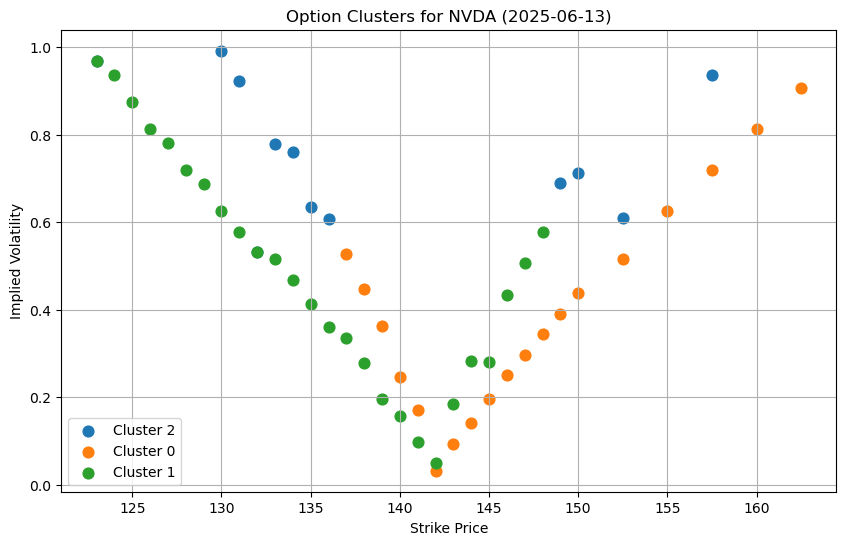

In [5]:
import matplotlib.pyplot as plt

# Plot Strike vs IV, color by cluster
plt.figure(figsize=(10,6))
for c in options['cluster'].unique():
    subset = options[options['cluster'] == c]
    plt.scatter(subset['strike'], subset['impliedVolatility'], label = f'Cluster {c}', s = 60)

plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title(f"Option Clusters for {symbol} ({chosen_exp})")
plt.legend()
plt.grid(True)
plt.show

